In [1]:
# Aline Cristina Pinto
# 2020031412

### Introdução à Programação de Computadores - 2020/2

# **Projeto Prático Final** 


Professores:

*   Jefersson Alex dos Santos - jefersson@dcc.ufmg.br
*   João Guilherme Maia de Menezes - jgmm@dcc.ufmg.br

------------------

# Introdução
---------------
Neste projeto realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados e estatísticas sobre economia mineral no Brasil gerados pelo Departamento Nacional de Produção Mineral, vinculado ao Ministério de Minas e Energia. Os dados utilizados estão disponíveis em [www.dnpm.gov.br](http://www.dnpm.gov.br/dnpm/publicacoes/serie-estatisticas-e-economia-mineral/estatisticas-e-economia-mineral "Estatísticas e Economia Mineral")

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.




Tarefa 0 - Leitura dos dados
---------

**Essa está pronta! :-)**

Na célula abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também criamos um dicionário <code>reg</code> pra facilitar o acesso aos registros.



In [2]:
# Baixando os dados do site oficial (link alternativo abaixo)
# !wget https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv

# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    file = open(filename, 'r', encoding='ISO-8859-1')
    
    # Criando uma lista vazia para armazenar todos os dados do arquivo
    dados = []
    
    # Para cada linha do arquivo, realizamos as seguintes operacoes: 
    # (1) removemos o caractere '\n' do final da linha
    # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
    # (3) removemos as aspas extras
    # (4) transformamos a linha em uma lista
    # (5) adicionamos a lista de itens na lista 'dados'
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
#rotulos, dados = le_dados("Cfem.csv")

#print (rotulos, '\n')
#print (dados[0])
#print ("Número total de registros: %d" % (len(dados)))

# Criando dicionario pra facilitar acesso aos registros
#index = 0
#reg = {}
#for d in rotulos:
#  reg[d] = index
#  index=index+1

#print(reg)

In [3]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter

In [4]:
# Obtem dados de forma global

rotulos, dados = le_dados("Cfem.csv")

In [5]:
# Constantes 

# Índices
ANO = rotulos.index('Ano de Referencia')
VALOR_ARRECADADO = rotulos.index('Valor Recolhido (CFEM)')
ESTADO = rotulos.index('Uf')
SUBSTANCIA = rotulos.index('Substância')
QUANTIDADE = rotulos.index('Quantidade Comercializada')

# Substâncias
BAUXITA = 'BAUXITA'
OURO = 'OURO'
FERRO = 'FERRO'

# Estados
MG = 'MG'
PA = 'PA'
RS = 'RS'
SC = 'SC'
PR = 'PR'

# Gráfico pizza
PARTICAO_MAXIMA = 10
PORCENTAGEM_MINIMA = 4

# Títulos
EXTRACAO_BAUXITA = 'Extração de BAUXITA por estado entre 2015 e 2020'
EXTRACAO_OURO = 'Extração de OURO por estado entre 2010 e 2020'
PERCENTUAL_ARRECADACAO_REGIAO_SUL = 'Arrecadação nos estados da Região SUL em 2019'
PERCENTUAL_ARRECADACAO_MG = 'Arrecadação no Estado de Minas Gerais em 2019'

# Descrições para Eixo y
EIXO_Y_EXTRACAO_BAUXITA = '(em milhões de t)'
EIXO_Y_EXTRACAO_OURO = '(em milhões de g)'

In [6]:
# Funções utilitárias

def formatar_string_para_float(valor):
    return 0 if valor == '' else float(valor.replace(',', '.'))

def dicionario_para_tupla(dicionario):
    return [(chave, valor) for chave, valor in dicionario.items()]

Tarefa 1 - Evolução da arrecadação ao longo dos anos
---------

**Agora é com você!** 

Implemente funções para gerar um gráfico de arrecadação do CFEM no Estado de Minas Gerais ao longo dos anos (2003 a 2021 em milhões de reais).



In [7]:
def buscar_registros_por_estado(estado, registros):
    return [registro for registro in registros if registro[ESTADO] == estado]

def buscar_registros_por_ano(ano, registros):
    return [registro for registro in registros if int(registro[ANO]) == ano]

def calcular_arrecadacao(registros):
    return sum(formatar_string_para_float(registro[VALOR_ARRECADADO]) for registro in registros)
    
def buscar_arrecadacao(ano_inicio, ano_fim):
    arrecadado = []
    anos = np.arange(ano_inicio, ano_fim + 1)
    registros = buscar_registros_por_estado(MG, dados)
    
    for ano in anos:
        registros_ano = buscar_registros_por_ano(ano, registros)
        arrecadado.append((ano, calcular_arrecadacao(registros_ano)))
    
    return arrecadado

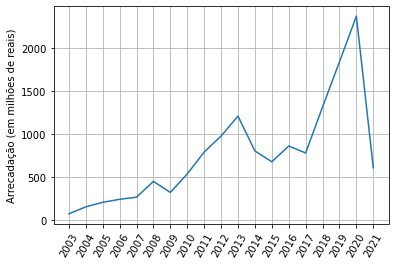

In [8]:
def criar_grafico_evolucao_arrecadacao(registros):
    x = []
    y = []
    
    for ano, valor_arrecadado in registros:
        x.append(int(ano))
        y.append(valor_arrecadado/(10**6)) # Em milhões
    
    plt.plot(x,y) 
    plt.grid(True)

    plt.xticks(x, rotation=60)
    
    plt.ylabel('Arrecadação (em milhões de reais)')
    
    plt.show()
    
criar_grafico_evolucao_arrecadacao(buscar_arrecadacao(2003, 2021))
# criar_grafico_evolucao_arrecadacao(buscar_arrecadacao(2004, 2021)) # -> O gráfico de exemplo começava em 2004,
# entretando o enunciado pede a partir de 2003.

Tarefa 2 - Extração de bauxita por estado entre 2015 e 2020
---------

Implemente um código capaz de plotar um gráfico de barras que mostra a extração de bauxita por estado brasileiro entre os anos de 2015 e 2020. 

In [9]:
def buscar_extracao_substancia_entre_anos_por_estado(substancia, ano_inicio, ano_fim):
    extracao_por_estado = {}    
    anos = np.arange(ano_inicio, ano_fim + 1)
    registros = [registro for registro in dados if registro[SUBSTANCIA] == substancia and int(registro[ANO]) in anos]
       
    for registro in registros:
        estado = registro[ESTADO]
        extracao = registro[QUANTIDADE]
        
        if estado != '':
            extracao_por_estado[estado] = extracao_por_estado.get(estado, 0.0) + formatar_string_para_float(extracao)
            
    return dicionario_para_tupla(extracao_por_estado)

extracao_bauxita = buscar_extracao_substancia_entre_anos_por_estado(BAUXITA, 2015, 2020)

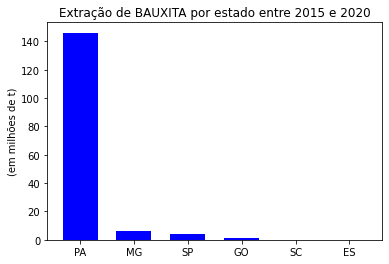

In [10]:
def criar_grafico_barras(registros, titulo, y_label):
    x = []
    y = []
    
    dados_ordenados = sorted(registros, reverse=True, key=itemgetter(1))
    
    for estado, extracao_bauxita in dados_ordenados:
        x.append(estado)
        y.append(extracao_bauxita/(10**6)) # Em milhões
    
    plt.bar(np.arange(len(y)), y, width=0.65, color='b')
    
    plt.title(titulo)
    plt.ylabel(y_label)
    
    plt.xticks(np.arange(len(y)), x)
    
    plt.show()
    
criar_grafico_barras(extracao_bauxita, EXTRACAO_BAUXITA, EIXO_Y_EXTRACAO_BAUXITA)

Tarefa 3 - Extração de ouro por estado nos últimos dez anos.
---------

Implemente códigos para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2010 até 2020) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

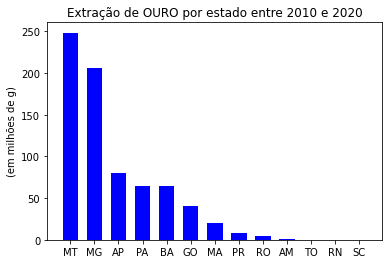

In [11]:
extracao_ouro = buscar_extracao_substancia_entre_anos_por_estado(OURO, 2010, 2020)

criar_grafico_barras(extracao_ouro, EXTRACAO_OURO, EIXO_Y_EXTRACAO_OURO)

Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará.
---------

Implemente códigos para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 1991 até 2019). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

In [12]:
def buscar_registros_entre_anos(anos, registros):
    return [registro for registro in registros if int(registro[ANO]) in anos]

def buscar_extracao_por_ano(registros):
    return sum(formatar_string_para_float(registro[QUANTIDADE]) for registro in registros)

def buscar_extracao_ferro(registros, anos):
    extracao = []
    
    for ano in anos:
        registros_ano = buscar_registros_entre_anos([ano], registros)
        extracao.append((ano, buscar_extracao_por_ano(registros_ano)))
        
    return extracao
    
def buscar_extracao_ferro_mg_pa(ano_inicio, ano_fim):
    anos = np.arange(ano_inicio, ano_fim + 1)
    
    registros_mg = [registro for registro in dados if registro[SUBSTANCIA] == FERRO and registro[ESTADO] == MG]
    registros_pa = [registro for registro in dados if registro[SUBSTANCIA] == FERRO and registro[ESTADO] == PA]
       
    return buscar_extracao_ferro(registros_mg, anos), buscar_extracao_ferro(registros_pa, anos)

# registros_mg, registros_pa = buscar_extracao_ferro_mg_pa(1991, 2021)
registros_mg, registros_pa = buscar_extracao_ferro_mg_pa(2003, 2021) # -> O gráfico de exemplo começava em 2003,
# entretando o enunciado pede a partir de 1991.

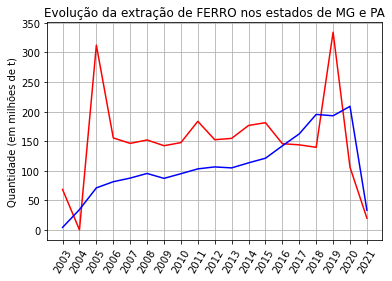

In [13]:
def criar_grafico_evolucao_extracao_mg_pa(registros_mg, registros_pa):
    x_mg = []
    x_pa = []
    y_mg = []
    y_pa = []
    
    for ano, extracao in registros_mg:
        x_mg.append(int(ano))
        y_mg.append(extracao/(10**6)) # Em milhões
    
    for ano, extracao in registros_pa:
        x_pa.append(int(ano))
        y_pa.append(extracao/(10**6)) # Em milhões
    
    plt.plot(x_mg, y_mg, label='MG', color='r')
    plt.plot(x_pa, y_pa, label='PA', color='b')
    
    plt.grid(True)

    plt.xticks(x_mg, rotation=60)
    plt.xticks(x_pa, rotation=60)
    
    plt.title('Evolução da extração de FERRO nos estados de MG e PA')
    plt.ylabel('Quantidade (em milhões de t)')
    
    plt.show()

criar_grafico_evolucao_extracao_mg_pa(registros_mg, registros_pa)

Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul no ano de 2019 por tipo de minério extraído.
---------

Implemente um código para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul no ano de 2019. Utilize o mesmo código para plotar o mesmo gráfico para o Estado de Minas Gerais.

Sugestão 1: use os exemplos da documentação do matplotlib para fazer o gráfico: [Basic Pie Chart!](http://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py")

Sugestão 2: por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)


In [14]:
def buscar_registros_por_estados_e_ano(estados, ano):
    return [registro for registro in dados if registro[ANO] == str(ano) and registro[ESTADO] in estados]

def buscar_arrecadacao_por_minerio_absoluta(registros):
    arrecadacao_por_minerio = {}
    for registro in registros:
        minerio = registro[SUBSTANCIA]
        arrecadacao = registro[VALOR_ARRECADADO]
        
        arrecadacao_por_minerio[minerio] = arrecadacao_por_minerio.get(minerio, 0.0) + formatar_string_para_float(arrecadacao)
    
    return dicionario_para_tupla(arrecadacao_por_minerio)

def calcular_percentual(registros):
    arrecadacao_percentual = []
    arrecadacao_total = sum(arrecadacao for minerio, arrecadacao in registros)
    
    for minerio, arrecadacao in registros:
        arrecadacao_percentual.append((minerio, ((arrecadacao/arrecadacao_total) * 100)))
    
    return arrecadacao_percentual

def agrupar_resultados(registros):
    agrupado = []
    contador = 0
    indice_registro = 0
    outros = 0
    registros_ordenados = sorted(registros, reverse=True, key=itemgetter(1))
    
    while contador < PARTICAO_MAXIMA and indice_registro < len(registros_ordenados):
        if registros_ordenados[indice_registro][1] >= PORCENTAGEM_MINIMA: # 0- minerio, 1- arrecadacao
            agrupado.append(registros_ordenados[indice_registro])
            contador += 1
        else:
            outros += registros_ordenados[indice_registro][1]
            
        indice_registro += 1
    
    agrupado.append(('OUTROS', outros))        
    return agrupado
    
def buscar_arrecadacao_por_minerio(estados, ano):    
    registros = buscar_registros_por_estados_e_ano(estados, ano)
    arrecadacao_absoluta = buscar_arrecadacao_por_minerio_absoluta(registros)
    arrecadacao_percentual = calcular_percentual(arrecadacao_absoluta)
    
    return agrupar_resultados(arrecadacao_percentual)

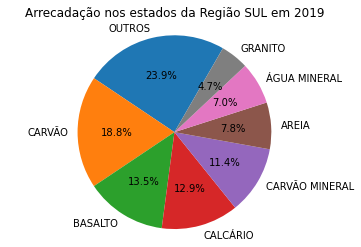

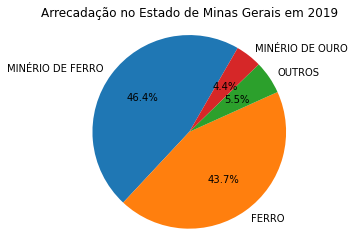

In [15]:
def criar_grafico_pizza(registros, titulo):
    labels = []
    sizes = []
    
    dados_ordenados = sorted(registros, reverse=True, key=itemgetter(1))
    
    for minerio, arrecadacao in dados_ordenados:
        labels.append(minerio)
        sizes.append(arrecadacao) 

    plt.title(titulo)
    plt.pie(sizes, labels=labels ,autopct='%1.1f%%', startangle=60)
    
    plt.axis('equal')
    
    plt.show()

criar_grafico_pizza(buscar_arrecadacao_por_minerio([PR, SC, RS], 2019), PERCENTUAL_ARRECADACAO_REGIAO_SUL)
criar_grafico_pizza(buscar_arrecadacao_por_minerio([MG], 2019), PERCENTUAL_ARRECADACAO_MG)    